# 🧪 Proyecto 4: Análisis de Datos Climáticos en Cúcuta
**Fuente de Datos:** Open-Meteo API

## 📌 Contexto
Una empresa local necesita comprender el comportamiento climático reciente en la ciudad de **Cúcuta, Colombia**. El objetivo es analizar patrones de temperatura, humedad y precipitación de los últimos días para apoyar la toma de decisiones operativas.

## 🧩 Objetivos del Análisis
1.  **Adquisición:** Obtener datos horarios reales mediante la API pública de Open-Meteo.
2.  **Limpieza:** Procesar los datos crudos para convertirlos en un formato analítico (DataFrame).
3.  **Exploración:** Analizar estadísticas descriptivas básicas.
4.  **Visualización:** Identificar tendencias y distribuciones mediante gráficos.

In [36]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import os

# Configuración de estilo para los gráficos
plt.style.use('seaborn-v0_8-whitegrid')

# Crear carpeta de resultados si no existe
os.makedirs("../results", exist_ok=True)

In [37]:
def crear_grafica_lineas(eje_x, eje_y, titulo, etiqueta_x, etiqueta_y, grid=True, color="blue", label=None, nombre=None):
    """
    Genera un gráfico de líneas para series temporales y lo guarda opcionalmente.
    """
    plt.figure(figsize=(15, 6))
    plt.plot(eje_x, eje_y, linestyle="-", color=color, label=label, linewidth=2)
    plt.title(titulo, fontsize=14, fontweight='bold')
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    
    if label:
        plt.legend()
    plt.grid(grid, alpha=0.5)
    
    if nombre:
        path = f"../results/{nombre}.png"
        plt.savefig(path, bbox_inches="tight", dpi=200)
        print(f"Gráfico guardado en: {path}")
        
    plt.show()
    plt.close()

def crear_histograma(datos, titulo, etiqueta_x, etiqueta_y, grid=True, color="blue", bins=10, label=None, nombre=None):
    """
    Genera un histograma para ver la distribución de una variable.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(datos, bins=bins, color=color, edgecolor="black", label=label, alpha=0.7)
    plt.title(titulo, fontsize=14, fontweight='bold')
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    
    if label:
        plt.legend()
    plt.grid(grid, alpha=0.5)
    
    if nombre:
        path = f"../results/{nombre}.png"
        plt.savefig(path, bbox_inches="tight", dpi=200)
        print(f"Gráfico guardado en: {path}")

    plt.show()
    plt.close()

## 1. Adquisición de Datos (API Open-Meteo)
Realizamos una petición `GET` a la API de Open-Meteo.
*   **Ubicación:** Cúcuta (Lat: 7.9, Lon: -72.5).
*   **Variables:** Temperatura, Humedad, Precipitación, Lluvia y Código de clima.
*   **Ventana de tiempo:** Últimos 5 días + pronóstico actual.

In [38]:
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": 7.9,
    "longitude": -72.5,
    "hourly": [
        "temperature_2m",
        "relative_humidity_2m",
        "precipitation",
        "rain",
        "weather_code",
    ],
    "timezone": "America/Bogota",
    "past_days": 5,  # Solicita datos de los últimos 5 días
}

# Petición a la API
res = requests.get(url, params=params)
data = res.json()

# Extracción de datos horarios
df = pd.DataFrame(data["hourly"])

# Vista previa de los datos crudos
df.head()


,time,temperature_2m,relative_humidity_2m,precipitation,rain,weather_code
0,2026-01-28T00:00,23.5,91,0.1,0.0,2
1,2026-01-28T01:00,23.9,93,0.0,0.0,2
2,2026-01-28T02:00,23.7,93,0.2,0.0,80
3,2026-01-28T03:00,23.5,94,0.1,0.0,2
4,2026-01-28T04:00,23.4,93,0.1,0.0,3


## 2. Limpieza y Preparación de Datos
Para facilitar el análisis, realizamos las siguientes transformaciones:
1.  **Renombrado de columnas:** Usar nombres en español y descriptivos.
2.  **Conversión de fechas:** La columna `time` viene como texto, la convertimos a objeto `datetime` para análisis temporal.
3.  **Selección de variables:** Filtramos las columnas necesarias para este estudio específico.

In [39]:
# 1. Renombrar columnas
columnas = ["Hora", "Temperatura", "Humedad", "Precipitacion", "Lluvia", "Codigo del clima"]
df.columns = columnas

# 2. Conversión de tipo de dato (Time -> Datetime)
df["Hora"] = pd.to_datetime(df["Hora"])

# 3. Selección final de columnas (Excluimos 'Codigo del clima' para este análisis numérico)
df_final = df[["Hora", "Temperatura", "Humedad", "Precipitacion", "Lluvia"]].copy()

# Verificación de estructura y nulos
display("Información del Dataset:")
df_final.info()
print("\nConteo de valores nulos:")
display(df_final.isnull().sum())

'Información del Dataset:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Hora           288 non-null    datetime64[ns]
 1   Temperatura    288 non-null    float64       
 2   Humedad        288 non-null    int64         
 3   Precipitacion  288 non-null    float64       
 4   Lluvia         288 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 11.4 KB

Conteo de valores nulos:


Hora             0
Temperatura      0
Humedad          0
Precipitacion    0
Lluvia           0
dtype: int64

## 3. Análisis Estadístico Descriptivo
Antes de visualizar, observamos las métricas clave (media, mínimos, máximos) para entender el rango de los datos.

In [40]:
# Estadísticas descriptivas (excluyendo la columna de Hora)
df_final.describe()

,Hora,Temperatura,Humedad,Precipitacion,Lluvia
count,288,288.000000,288.000000,288.000000,288.0
mean,2026-02-02 23:30:00,25.563889,81.548611,0.087500,0.0
min,2026-01-28 00:00:00,22.100000,53.000000,0.000000,0.0
25%,2026-01-30 23:45:00,24.000000,77.000000,0.000000,0.0
50%,2026-02-02 23:30:00,25.100000,83.000000,0.000000,0.0
75%,2026-02-05 23:15:00,26.725000,88.000000,0.100000,0.0
max,2026-02-08 23:00:00,30.800000,98.000000,2.100000,0.0
std,NaN,1.900600,8.668763,0.210649,0.0


## 4. Visualización de Datos
A continuación, generamos gráficos para responder a las preguntas de negocio sobre el comportamiento del clima.

**Nota importante:** Los siguientes análisis corresponden a la ventana de tiempo ejecutada (finales de enero e inicios de febrero de 2026). Dado que este notebook consulta una API en tiempo real, los patrones específicos cambiarán según la fecha en que se ejecute el código.

### 4.1 Tendencia de la Temperatura
Observamos cómo fluctúa la temperatura a lo largo de las horas.

Gráfico guardado en: ../results/temperatura_vs_tiempo.png


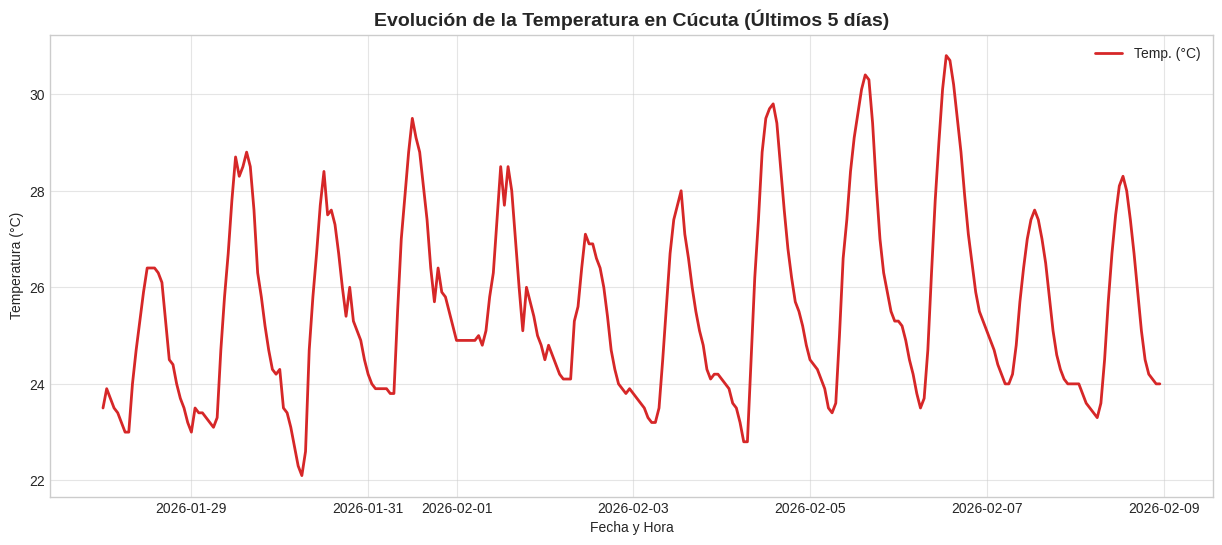

In [41]:
crear_grafica_lineas(
    eje_x=df_final["Hora"],
    eje_y=df_final["Temperatura"],
    titulo="Evolución de la Temperatura en Cúcuta (Últimos 5 días)",
    etiqueta_x="Fecha y Hora",
    etiqueta_y="Temperatura (°C)",
    color="tab:red",
    label="Temp. (°C)",
    nombre="temperatura_vs_tiempo",
)

### Descripción de la grafica Evolución de la Temperatura en Cúcuta (Últimos 5 días)
Al observar el gráfico de línea roja (*Temperatura vs Tiempo*), identificamos un patrón **cíclico diurno** muy marcado, típico de zonas tropicales como Cúcuta:
*   **Ciclos Diarios:** La temperatura sube y baja rítmicamente cada 24 horas.
*   **Rango Térmico:** Los valles (mínimos) se sitúan alrededor de los **22°C - 23°C** (madrugadas), mientras que los picos (máximos) alcanzan entre **28°C y 31°C** (mediodía/tarde).
*   **Tendencia:** En los últimos días mostrados, se observa una ligera tendencia al alza en los picos máximos, sugiriendo días progresivamente más calurosos hacia el final de la ventana de tiempo.

### 4.2 Distribución de la Temperatura
Este histograma nos permite ver cuál es la temperatura más frecuente en la ciudad durante el periodo analizado.

Gráfico guardado en: ../results/histograma_temperatura.png


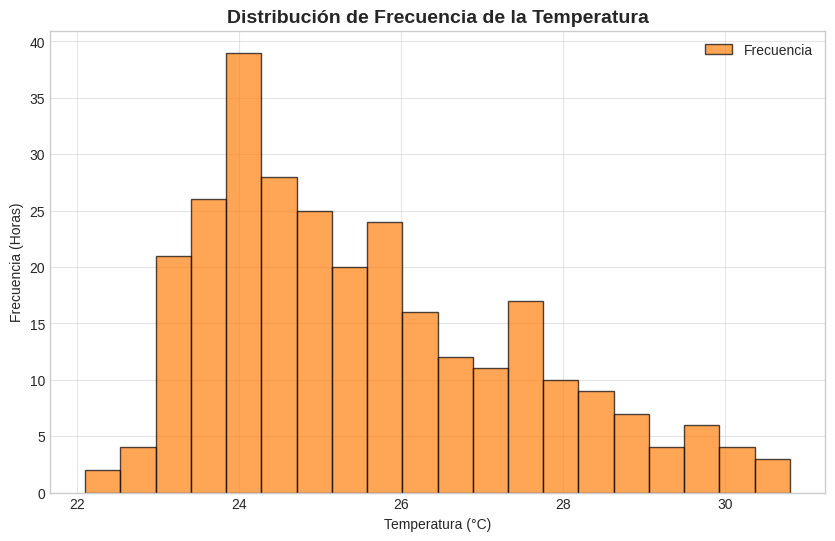

In [42]:
crear_histograma(
    datos=df_final['Temperatura'], 
    titulo='Distribución de Frecuencia de la Temperatura', 
    etiqueta_x='Temperatura (°C)', 
    etiqueta_y='Frecuencia (Horas)', 
    color='tab:orange', 
    bins=20, 
    label='Frecuencia', 
    nombre='histograma_temperatura'
)

### Descripción de la grafica Distribución de Frecuencia de la Temperatura
El histograma naranja nos revela la frecuencia de las temperaturas:
*   **Moda (Valor más frecuente):** La barra más alta está en los **24°C**. Esto indica que, durante la mayor parte de las horas del día (probablemente noches y mañanas), la ciudad se mantiene en una temperatura templada-cálida.
*   **Sesgo:** La distribución tiene una "cola" hacia la derecha. Aunque la mayoría del tiempo está entre 23°C y 26°C, existen momentos puntuales de calor intenso (>30°C), pero son menos frecuentes en duración total.

### 4.3 Comportamiento de la Humedad
Analizamos la humedad relativa para ver su relación inversa con la temperatura (típicamente, a mayor temperatura, menor humedad relativa).

Gráfico guardado en: ../results/humedad_vs_tiempo.png


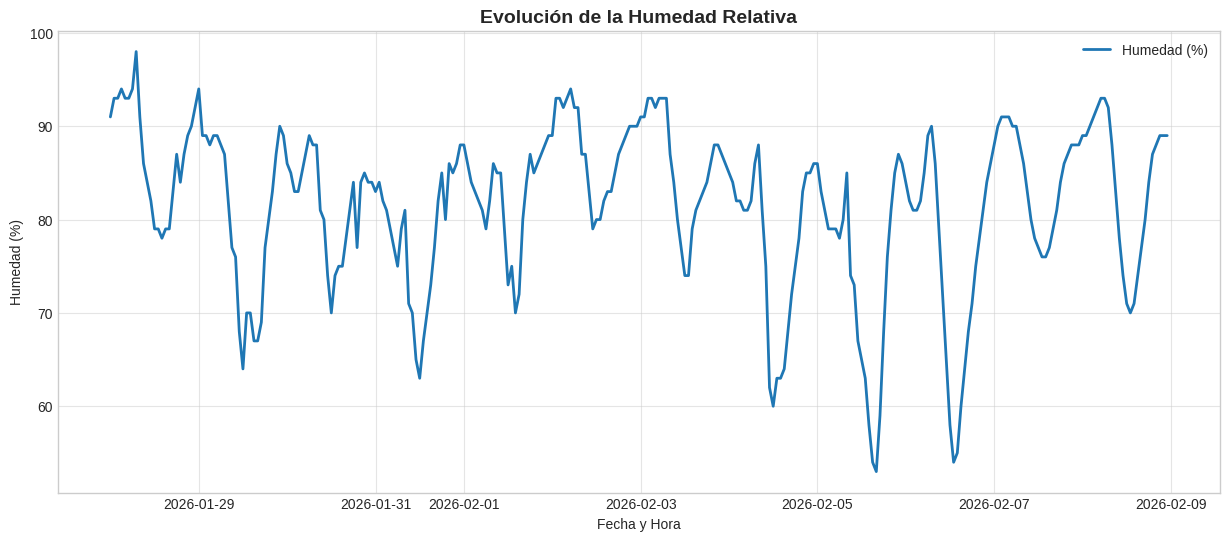

In [43]:
crear_grafica_lineas(
    eje_x=df_final["Hora"],
    eje_y=df_final["Humedad"],
    titulo="Evolución de la Humedad Relativa",
    etiqueta_x="Fecha y Hora",
    etiqueta_y="Humedad (%)",
    color="tab:blue",
    label="Humedad (%)",
    nombre="humedad_vs_tiempo",
)

### Descripción de la grafica Evolución de la Humedad Relativa
El gráfico azul oscuro muestra una correlación inversa casi perfecta con la temperatura:
*   **Máximos (>90%):** Ocurren durante la madrugada, cuando la temperatura es más baja. Esto sugiere mañanas con sensación de "bochorno" o presencia de rocío.
*   **Mínimos (~50-60%):** La humedad cae drásticamente al mediodía cuando la temperatura sube.
*   **Estabilidad:** El patrón es constante, sin anomalías drásticas de sequedad extrema (valores <40%).


### 4.4 Eventos de Precipitación
Identificamos si hubo lluvias significativas durante el periodo.

Gráfico guardado en: ../results/precipitacion_tiempo.png


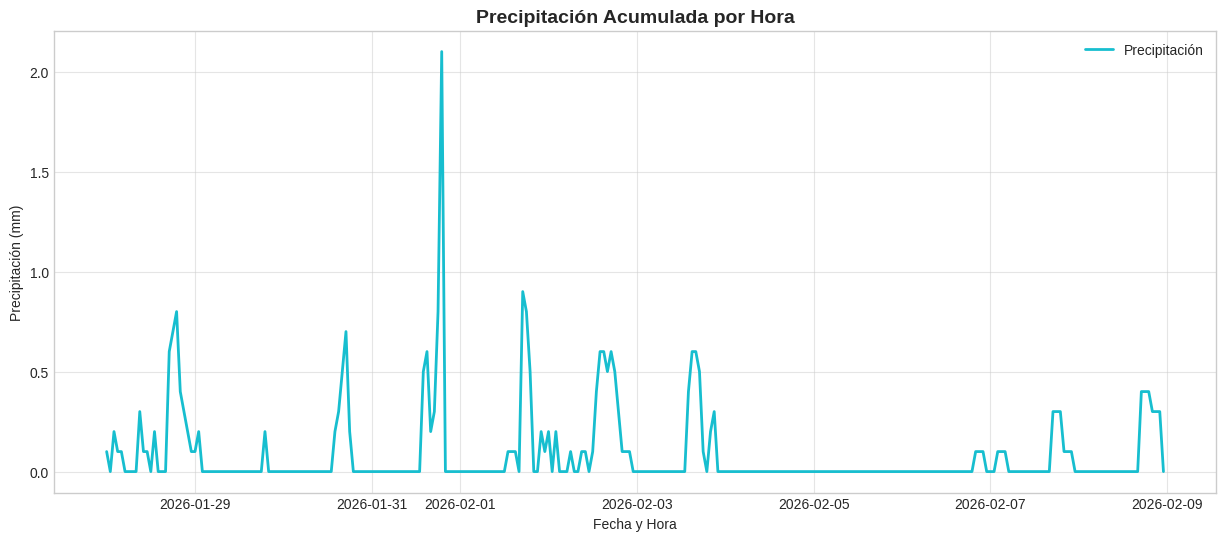

In [44]:
crear_grafica_lineas(
    eje_x=df_final['Hora'], 
    eje_y=df_final['Precipitacion'], 
    titulo='Precipitación Acumulada por Hora', 
    etiqueta_x='Fecha y Hora', 
    etiqueta_y='Precipitación (mm)', 
    color='tab:cyan', 
    label='Precipitación', 
    nombre='precipitacion_tiempo'
)

### Descripción de la grafica Precipitación Acumulada por Hora
El gráfico de línea cian muestra el comportamiento de las lluvias:
*   **Intermitencia:** La línea se mantiene en 0 mm la mayor parte del tiempo, lo que es normal. La lluvia es un evento discreto, no continuo.
*   **Eventos Puntuales:** Se observa un pico destacado alrededor del **1 de febrero**, superando los **2.0 mm** de precipitación acumulada por hora. Esto indica un evento de lluvia moderada/fuerte en ese momento específico.
*   **Lloviznas:** Se observan otros picos menores (<0.5 mm) dispersos, que corresponden a lloviznas ligeras o chubascos pasajeros.


## 5. Conclusiones del Proyecto

Tras procesar y analizar los datos meteorológicos de Cúcuta obtenidos vía API, concluimos:

1.  **Clima Tropical Estable:** La ciudad presenta un comportamiento térmico predecible con una oscilación diaria de aproximadamente 8°C a 9°C. No hay olas de frío ni de calor extremas fuera de lo habitual en esta ventana de tiempo.
2.  **Confort Térmico:** Aunque se alcanzan los 31°C, la temperatura predominante (moda) es de 24°C, lo que sugiere que las noches compensan el calor diurno.
3.  **Relación Temperatura-Humedad:** Se confirma la relación física inversa: las horas más calurosas son las menos húmedas. Esto es relevante para la sensación térmica; 30°C con 60% de humedad se siente más caluroso que con 40%.
4.  **Precipitación:** Durante el periodo analizado, hubo al menos un evento de lluvia significativo. Para una empresa operativa, esto implica que, aunque el clima es mayormente seco, deben existir planes de contingencia para lluvias repentinas de corta duración.